In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import logging 
import seaborn as sns
import pandas as pd
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'svg'

In [5]:
# make sure to install keras-gpu and tensorflow-gpu
# restart the kernel and run this command
# if it outputs an empty list, you might want to check whether compatible drivers for your card and operating systems are up to date
# ignore this if you don't have a CUDA or OpenCL GPU compatible with Tensorflow, this will still work perfectly fine on a CPU

#tf.config.list_physical_devices('GPU')

In [6]:
# if the previous command is OK, you can use your GPU to speed up the training! (in general, remember that your main limitation is your VRAM)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
# keras 2.6.0 or higher is required for the Normalization routine
# do not install tensorflow with pip, keras-gpu requires tensorflow 2.6.0, use conda

print(tf.keras.__version__)

2.12.0


# Predicting good or bad coffee roasts 

This dataset is a very simplified model of the coffee roasting process. The goal is to predict whether a coffee roast is good or bad based on the temperature and time of the roast. 

We can use the following data to train a model to predict whether a coffee roast is good or bad. For instance, the target values are 0 for bad roasts and 1 for good roasts and we could imagine they've been determined with a blind taste test for each sample, using the same exact coffee beans, the same exact roasting machine, grinding equipment and size, as well as brewing method, and the same exact tasters. 

In [8]:
# X (T [celsius], t [minutes])

X = np.array([[185.32,  12.69],
       [259.92,  11.87],
       [231.01,  14.41],
       [175.37,  11.72],
       [187.12,  14.13],
       [225.91,  12.1 ],
       [208.41,  14.18],
       [207.08,  14.03],
       [280.6 ,  14.23],
       [202.87,  12.25],
       [196.7 ,  13.54],
       [270.31,  14.6 ],
       [192.95,  15.2 ],
       [213.57,  14.28],
       [164.47,  11.92],
       [177.26,  15.04],
       [241.77,  14.9 ],
       [237.  ,  13.13],
       [219.74,  13.87],
       [266.39,  13.25],
       [270.45,  13.95],
       [261.96,  13.49],
       [243.49,  12.86],
       [220.58,  12.36],
       [163.59,  11.65],
       [244.76,  13.33],
       [271.19,  14.84],
       [201.99,  15.39],
       [229.93,  14.56],
       [204.97,  12.28],
       [173.19,  12.22],
       [231.51,  11.95],
       [152.69,  14.83],
       [163.42,  13.3 ],
       [215.95,  13.98],
       [218.04,  15.25],
       [251.3 ,  13.8 ],
       [233.33,  13.53],
       [280.24,  12.41],
       [243.02,  13.72],
       [155.67,  12.68],
       [275.17,  14.64],
       [151.73,  12.69],
       [151.32,  14.81],
       [164.9 ,  11.73],
       [282.55,  13.28],
       [192.98,  11.7 ],
       [202.6 ,  12.96],
       [220.67,  11.53],
       [169.97,  12.34],
       [209.47,  12.71],
       [232.8 ,  12.64],
       [272.8 ,  15.35],
       [158.02,  12.34],
       [226.01,  14.58],
       [158.64,  12.24],
       [211.66,  14.17],
       [271.95,  14.97],
       [257.16,  11.71],
       [281.85,  13.96],
       [161.63,  12.52],
       [233.8 ,  13.04],
       [210.29,  14.72],
       [261.24,  13.69],
       [256.98,  13.12],
       [281.56,  13.92],
       [280.64,  11.68],
       [269.16,  13.74],
       [246.34,  12.27],
       [224.07,  12.66],
       [164.24,  11.51],
       [272.42,  14.18],
       [177.68,  12.53],
       [212.86,  14.77],
       [165.88,  15.37],
       [277.43,  12.48],
       [236.51,  12.94],
       [244.14,  11.85],
       [213.45,  13.85],
       [234.57,  14.27],
       [270.34,  12.47],
       [170.68,  13.06],
       [226.79,  15.34],
       [245.92,  14.45],
       [281.32,  12.57],
       [185.03,  13.19],
       [189.88,  14.1 ],
       [278.48,  12.11],
       [219.92,  14.21],
       [216.58,  15.15],
       [249.48,  15.03],
       [165.09,  12.28],
       [158.87,  14.82],
       [279.98,  11.56],
       [256.55,  14.41],
       [272.61,  12.58],
       [246.49,  12.45],
       [160.26,  14.48],
       [155.7 ,  14.3 ],
       [188.27,  13.45],
       [270.36,  12.47],
       [213.22,  12.92],
       [175.7 ,  13.39],
       [174.52,  14.7 ],
       [233.  ,  12.63],
       [281.37,  12.88],
       [240.62,  14.43],
       [185.81,  11.55],
       [270.5 ,  15.33],
       [172.98,  12.11],
       [208.41,  13.89],
       [283.51,  15.35],
       [283.36,  12.48],
       [230.85,  13.24],
       [181.24,  11.76],
       [172.78,  12.93],
       [161.88,  12.1 ],
       [156.03,  13.99],
       [216.52,  12.47],
       [221.06,  13.2 ],
       [238.99,  15.23],
       [197.69,  14.08],
       [179.55,  15.26],
       [233.39,  12.13],
       [184.7 ,  12.14],
       [174.18,  12.73],
       [261.11,  13.33],
       [187.42,  13.18],
       [186.1 ,  14.43],
       [157.94,  12.66],
       [193.64,  12.23],
       [249.65,  12.22],
       [190.56,  11.73],
       [252.  ,  12.96],
       [238.55,  12.37],
       [152.94,  12.79],
       [255.17,  14.85],
       [197.09,  14.89],
       [156.8 ,  13.59],
       [184.75,  13.26],
       [179.92,  15.07],
       [190.79,  15.28],
       [164.73,  13.22],
       [209.87,  14.34],
       [196.58,  13.47],
       [159.51,  12.74],
       [247.87,  11.92],
       [212.44,  12.45],
       [172.34,  11.99],
       [259.87,  14.25],
       [201.23,  13.07],
       [248.34,  13.92],
       [273.66,  15.18],
       [215.09,  14.14],
       [223.53,  12.74],
       [211.22,  14.38],
       [224.61,  14.03],
       [215.75,  15.31],
       [254.82,  12.02],
       [259.9 ,  15.17],
       [260.25,  12.87],
       [199.67,  12.47],
       [157.52,  13.39],
       [264.81,  14.58],
       [239.4 ,  14.89],
       [238.98,  12.39],
       [258.43,  12.97],
       [270.16,  12.81],
       [162.41,  14.42],
       [164.53,  14.98],
       [205.61,  14.62],
       [157.1 ,  13.68],
       [241.38,  12.02],
       [232.13,  12.07],
       [191.04,  12.96],
       [233.64,  12.02],
       [174.95,  14.63],
       [246.64,  13.32],
       [188.07,  14.27],
       [213.16,  12.75],
       [268.08,  12.31],
       [258.58,  13.97],
       [237.21,  14.23],
       [251.02,  15.02],
       [274.28,  12.52],
       [172.12,  15.09],
       [177.52,  12.39],
       [258.71,  15.36],
       [264.01,  13.57],
       [200.71,  15.45],
       [249.37,  14.02],
       [151.5 ,  12.28],
       [151.82,  15.13],
       [181.92,  12.18],
       [228.65,  12.31],
       [223.78,  15.3 ],
       [266.63,  12.48],
       [273.68,  13.1 ],
       [220.61,  12.8 ],
       [284.99,  12.73]])

In [9]:
# Outcome given by the taste test 

Y = np.array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [10]:
X.shape, Y.shape

((200, 2), (200, 1))

# Reshaping data 

Let's put the data into a pandas dataframe and take a look at it.

In [11]:
df_raw = pd.DataFrame({'Temperature_celsius': X[:, 0], 'Time_min': X[:, 1], 'Good_roast': Y[:, 0]})
df_raw

,Temperature_celsius,Time_min,Good_roast
0,185.32,12.69,1.0
1,259.92,11.87,0.0
2,231.01,14.41,0.0
3,175.37,11.72,0.0
4,187.12,14.13,1.0
...,...,...,...
195,223.78,15.30,0.0
196,266.63,12.48,0.0
197,273.68,13.10,0.0
198,220.61,12.80,1.0


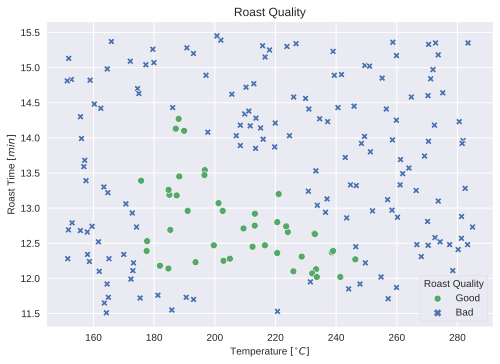

In [12]:
# Visualizing the data points 
fig = sns.scatterplot(data=df_raw, x='Temperature_celsius', y='Time_min', style='Good_roast', markers=['X', 'o'], hue='Good_roast')
plt.legend(title='Roast Quality', loc='lower right', labels=['Good', 'Bad'], frameon=True, framealpha=1)
plt.xlabel(r'Temperature $[^{\circ}C]$')
plt.ylabel(r'Roast Time $[min]$')
plt.title('Roast Quality')
plt.show()

# Normalizing data 

You can easily notice that the numerical values for the temperature and time differ by a whole order of magnitude. In order to optimize the training process, we need to normalize the data. 

In [13]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

norm_l = tf.keras.layers.Normalization(axis=-1) # create a normalization layer
norm_l.adapt(X) # let tensorflow learn the mean and variance 
Xn = norm_l(X) # create normalized dataset 

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


Let's make a new dataframe with the normalized data for the sake of clarity.

In [14]:
df_norm = pd.DataFrame({'Temperature-n_celsius': Xn[:, 0], 'Time-n_min': Xn[:, 1], 'Good_roast': Y[:, 0]})
df_norm

,Temperature-n_celsius,Time-n_min,Good_roast
0,-0.834490,-0.656321,1.0
1,1.032307,-1.383054,0.0
2,0.308860,0.868047,0.0
3,-1.083480,-1.515993,0.0
4,-0.789447,0.619894,1.0
...,...,...,...
195,0.127936,1.656819,0.0
196,1.200218,-0.842435,0.0
197,1.376637,-0.292953,0.0
198,0.048610,-0.558832,1.0


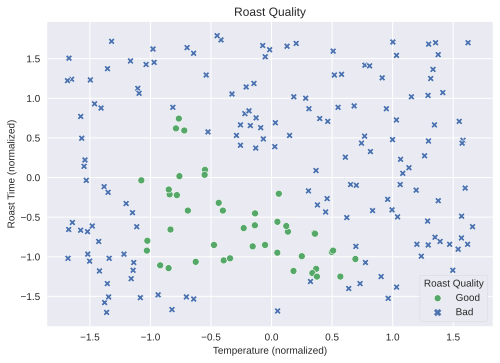

In [15]:
# Visualizing the data points 
fig = sns.scatterplot(data=df_norm, x='Temperature-n_celsius', y='Time-n_min', style='Good_roast', markers=['X', 'o'], hue='Good_roast')
plt.legend(title='Roast Quality', loc='lower right', labels=['Good', 'Bad'], frameon=True, framealpha=1)
plt.xlabel('Temperature (normalized)')
plt.ylabel('Roast Time (normalized)')
plt.title('Roast Quality')
plt.show()

# Tiling data 

Tiling is a technique that allows us to expand the size of our dataset by creating new samples from existing ones. This is useful in order to reduce the number of training epochs required to train a model.

In [16]:
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))

Xt.shape, Yt.shape

((200000, 2), (200000, 1))

In [17]:
df_tiled = pd.DataFrame({'Temperature-n_celsius': Xt[:, 0], 'Time-n_min': Xt[:, 1], 'Good_roast': Yt[:, 0]})
df_tiled

,Temperature-n_celsius,Time-n_min,Good_roast
0,-0.834490,-0.656321,1.0
1,1.032307,-1.383054,0.0
2,0.308860,0.868047,0.0
3,-1.083480,-1.515993,0.0
4,-0.789447,0.619894,1.0
...,...,...,...
199995,0.127936,1.656819,0.0
199996,1.200218,-0.842435,0.0
199997,1.376637,-0.292953,0.0
199998,0.048610,-0.558832,1.0


# Creating a sequential neural network

We can create a sequential neural network using the Keras API, which is a high-level API for TensorFlow. 

In [18]:
tf.random.set_seed(1234) # a seed is needed to achieve consistent results

model = Sequential(
    [
        tf.keras.Input(shape=(2, )), # expected shape
        Dense(3, activation='sigmoid', name='layer1'), # layer with 3 neurons, using sigmoid function for activation 
        Dense(1, activation='sigmoid', name='layer2')  # layer with 1 neuron
    ]
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [20]:
L1_num_params = 2 * 3 + 3 # W1 params + b1 params 
L2_num_params = 3 * 1 + 1 # W2 params + b2 params 

Tensorflow instantiated weights and biases for us, the size of the weights (per layer) is determined by the number of input features and the number of neurons in the layer, whereas the size of the biases is determined by the number of neurons in the layer. 

We can double check the size of the weights and biases using the `get_weights()` method.

In [21]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()

In [22]:
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.21195251 -0.93007755  0.5215299 ]
 [ 0.81569934 -0.07379878  0.97947836]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-1.1047078 ]
 [ 0.5711111 ]
 [ 0.79614127]] 
b2(1,): [0.]


## Training the model 

We can use the automated routines provided by the Keras API to train the model. 

+ The `model.compile()` method compiles the model, which means it prepares the model for training by defining a loss function and an optimizer.
+ The `model.fit()` method trains the model by using the training data and the target values with the gradient descent algorithm.

In [23]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(
    Xt, Yt, 
    epochs=10
)

Epoch 1/10
6250/6250 [==============================] - 3s 512us/step - loss: 0.1834
Epoch 2/10
6250/6250 [==============================] - 3s 495us/step - loss: 0.1142
Epoch 3/10
6250/6250 [==============================] - 3s 505us/step - loss: 0.0336
Epoch 4/10
6250/6250 [==============================] - 3s 503us/step - loss: 0.0148
Epoch 5/10
6250/6250 [==============================] - 3s 516us/step - loss: 0.0094
Epoch 6/10
6250/6250 [==============================] - 3s 502us/step - loss: 0.0065
Epoch 7/10
6250/6250 [==============================] - 3s 497us/step - loss: 0.0045
Epoch 8/10
6250/6250 [==============================] - 3s 500us/step - loss: 0.0031
Epoch 9/10
6250/6250 [==============================] - 3s 503us/step - loss: 0.0022
Epoch 10/10
6250/6250 [==============================] - 3s 509us/step - loss: 0.0016


Notice that this model uses 10 epochs to train (which we explicitly set) and that the training happens in batches. Our tiled dataset has 200'000 entries, so with Tensorflow's default batch size of 32, we have 6250 batches to train for each epoch.

We can also notice that the weights have been updated after training.

In [24]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.699124    0.1115805 -11.005302 ]
 [ 12.225525   10.341016   -0.326845 ]] 
b1: [  2.0448434  12.464568  -11.82215  ]
W2:
 [[-46.694733]
 [ 45.060898]
 [-55.259182]] 
b2: [-13.669991]


# Making predictions 

Having trained the model, we can now use it to make predictions. Let's start with a couple of plausible entries.

In [25]:
X_test = np.array([
    [200, 13.9], 
    [200, 17]
])

# remember to normalize the new data points! 

X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print('predictions: \n', predictions)

1/1 [==============================] - 0s 44ms/step
predictions: 
 [[9.9267840e-01]
 [2.2025895e-07]]


Remember that our model uses the sigmoid function as its activation function, so each prediction is a probability between 0 and 1. 

We can simply turn these probabilities into binary predictions by applying a threshold.

In [26]:
yhat = (predictions >= 0.5).astype(int)

print(f'decisions: \n{yhat}')

decisions: 
[[1]
 [0]]
